In [1]:
from fastai.tabular import *
from fastai import *

## Looking at sample data

In [2]:
pubsamp = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/train_V2.csv')#, nrows=10000)
pubsamp_test = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/test_V2.csv')#, nrows=10000)
# pubsamp = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/train_V2.csv', nrows=10000)
# pubsamp_test = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/test_V2.csv', nrows=10000)

In [3]:
pubsamp.shape
pubsamp.columns
pubsamp.dtypes

(4446966, 29)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [4]:
pubsamp.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
pubsamp_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [6]:
pubsamp_test.shape
pubsamp_test.columns

(1934174, 28)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')

In [7]:
len(pubsamp['matchId'].unique())

47965

In [8]:
train = pubsamp
summ = pd.DataFrame({'Variable':train.columns.values,
                   'dtype':train.dtypes.values,
                   'n_missing':[train[col].shape[0]-train[col].dropna().shape[0] for col in train.columns],
                   'perc_missing':[(train[col].shape[0]-train[col].dropna().shape[0])*100/train[col].shape[0] for col in train.columns],
                   'unique_cnt' : [len(train[col].unique()) for col in train.columns],
                   'unique_values': [(train[col].unique()) if (len(train[col].unique())<10) else 'UniqueVals>10' for col in train.columns]},
                   index=np.arange(train.shape[1]))

In [9]:
summ

,Variable,dtype,n_missing,perc_missing,unique_cnt,unique_values
0,Id,object,0,0.000000,4446966,UniqueVals>10
1,groupId,object,0,0.000000,2026745,UniqueVals>10
2,matchId,object,0,0.000000,47965,UniqueVals>10
3,assists,int64,0,0.000000,20,UniqueVals>10
4,boosts,int64,0,0.000000,27,UniqueVals>10
5,damageDealt,float64,0,0.000000,29916,UniqueVals>10
6,DBNOs,int64,0,0.000000,39,UniqueVals>10
7,headshotKills,int64,0,0.000000,34,UniqueVals>10
8,heals,int64,0,0.000000,63,UniqueVals>10
9,killPlace,int64,0,0.000000,101,UniqueVals>10


## Model Pre Steps

In [10]:
dep_var = 'winPlacePerc'
cont_names = ['assists', 'boosts', 'damageDealt', 'DBNOs','headshotKills', 'heals', 'killPlace', 'killPoints', 'kills']#,
#        'killStreaks', 'longestKill', 'matchDuration',  'maxPlace','numGroups', 'rankPoints', 'revives', 
#     'rideDistance', 'roadKills','swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints']
cat_names = ['matchType']
procs = [FillMissing, Categorify, Normalize]

In [11]:
pubpath = Path('/mnt/datadrive1/h216520/fastai_v3/data/PUBG')

In [12]:
pubpath

PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/PUBG')

In [13]:
data = (TabularList.from_df(pubsamp, cat_names=cat_names, cont_names=cont_names, procs=procs, path=pubpath)
        .split_by_idx(list(np.random.permutation(pubsamp.shape[0]))[:int(pubsamp.shape[0]*.1)])
        .label_from_df(cols=dep_var)
#         .add_test(pubsamp_test, label=0)
        .databunch(bs=256))

In [14]:
data.show_batch(10);data.show_batch(10, DatasetType=DatasetType.Valid)

matchType,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,target
duo,-0.3972,-0.0622,0.1382,1.1716,-0.3764,0.9819,-1.0416,-0.8050,0.6898,0.7020999789237976
squad,-0.3972,-0.6450,-0.5714,-0.5742,-0.3764,-0.5111,0.9974,-0.8050,-0.5933,0.15379999577999115
squad-fpp,-0.3972,-0.6450,-0.7652,-0.5742,-0.3764,-0.5111,0.5240,-0.8050,-0.5933,0.5555999875068665
squad,-0.3972,0.5206,-0.7652,-0.5742,-0.3764,1.3551,-0.3862,-0.8050,-0.5933,0.833299994468689
duo-fpp,-0.3972,-0.6450,-0.3216,-0.5742,-0.3764,-0.1378,-0.6047,-0.8050,0.0483,0.5217000246047974
solo-fpp,-0.3972,-0.6450,-0.1797,-0.5742,1.2829,-0.5111,-0.8959,-0.8050,0.0483,0.8557000160217285
solo-fpp,-0.3972,-0.6450,-0.7652,-0.5742,-0.3764,-0.5111,-0.0585,1.2028,-0.5933,0.9375
squad,3.0012,5.1829,1.9842,2.0444,2.9422,3.5946,-1.6241,1.8992,2.6144,0.9629999995231628
squad-fpp,3.0012,-0.6450,-0.3775,-0.5742,-0.3764,2.4749,0.2328,-0.8050,-0.5933,0.5861999988555908
duo-fpp,-0.3972,4.0173,5.3765,4.6630,4.6015,-0.1378,-1.6970,-0.8050,5.8220,0.9574000239372253


matchType,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,target
duo-fpp,-0.3972,-0.0622,-0.0896,0.2987,-0.3764,-0.5111,-0.3498,1.3813,0.0483,0.2888999879360199
solo-fpp,-0.3972,2.2689,1.5767,-0.5742,1.2829,1.3551,-1.6605,1.0993,1.9728,0.979200005531311
solo-fpp,-0.3972,-0.6450,-0.7652,-0.5742,-0.3764,-0.5111,0.4876,-0.8050,-0.5933,0.5213000178337097
squad-fpp,-0.3972,2.2689,1.0632,2.0444,1.2829,3.5946,-1.5877,1.6156,2.6144,0.9230999946594238
solo,-0.3972,0.5206,-0.7652,-0.5742,-0.3764,-0.5111,-0.0221,-0.8050,-0.5933,0.7935000061988831
squad-fpp,-0.3972,-0.6450,-0.7652,-0.5742,-0.3764,-0.5111,0.7061,1.2937,-0.5933,0.37040001153945923
duo-fpp,-0.3972,-0.6450,-0.7652,-0.5742,-0.3764,-0.5111,1.3615,-0.8050,-0.5933,0.08699999749660492
duo-fpp,-0.3972,0.5206,0.6118,1.1716,1.2829,-0.5111,-0.4954,-0.8050,0.0483,0.23399999737739563
squad-fpp,-0.3972,-0.6450,-0.1797,0.2987,-0.3764,-0.5111,-0.6047,1.2140,0.0483,0.26919999718666077
squad-fpp,1.3020,1.1034,2.8010,2.9173,2.9422,0.2354,-1.5877,-0.8050,3.2559,0.8845999836921692


In [15]:
learn = tabular_learner(data, layers=[25, 25])#, emb_szs={'n_cat':5})#, metrics=)

In [16]:
learn

Learner(data=DataBunch;
Train: LabelList
y: FloatList (4002270 items)
[FloatItem 0.44440001249313354, FloatItem 0.6399999856948853, FloatItem 0.7754999995231628, FloatItem 0.16670000553131104, FloatItem 0.1875]...
Path: .
x: TabularList (4002270 items)
[TabularLine matchType squad-fpp; assists -0.3972; boosts -0.6450; damageDealt -0.7652; DBNOs -0.5742; headshotKills -0.3764; heals -0.5111; killPlace 0.4512; killPoints 1.1726; kills -0.5933; , TabularLine matchType squad-fpp; assists -0.3972; boosts -0.6450; damageDealt -0.2297; DBNOs -0.5742; headshotKills -0.3764; heals -0.5111; killPlace 0.3420; killPoints -0.8050; kills -0.5933; , TabularLine matchType duo; assists 1.3020; boosts -0.6450; damageDealt -0.3671; DBNOs -0.5742; headshotKills -0.3764; heals -0.5111; killPlace -0.0221; killPoints -0.8050; kills -0.5933; , TabularLine matchType squad-fpp; assists -0.3972; boosts -0.6450; damageDealt -0.5726; DBNOs -0.5742; headshotKills -0.3764; heals -0.5111; killPlace 0.9974; killPoints

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


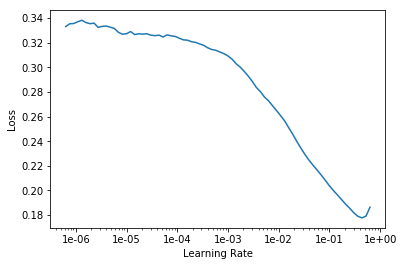

In [17]:
learn.lr_find()

learn.recorder.plot()

In [ ]:
learn.fit(5, 1e-3)

epoch,train_loss,valid_loss
1,nan,nan
2,nan,nan


In [ ]:
learn = tabular_learner(data, layers=[25, 25])#, emb_szs={'n_cat':5})#, metrics=)
learn.fit_one_cycle(5, 1e-2)